In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets

In [40]:
iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target



In [41]:
C = 10 
svc = svm.SVC(C=C,kernel='poly',degree=3).fit(X,Y)
Y_hat = svc.predict(X)

In [50]:
#Para dibujar la curva de desición
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
h = (x_max-x_min)/100

xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
x_plot = np.c_[xx.ravel(),yy.ravel()]

In [52]:
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel polinómico de grado 3')

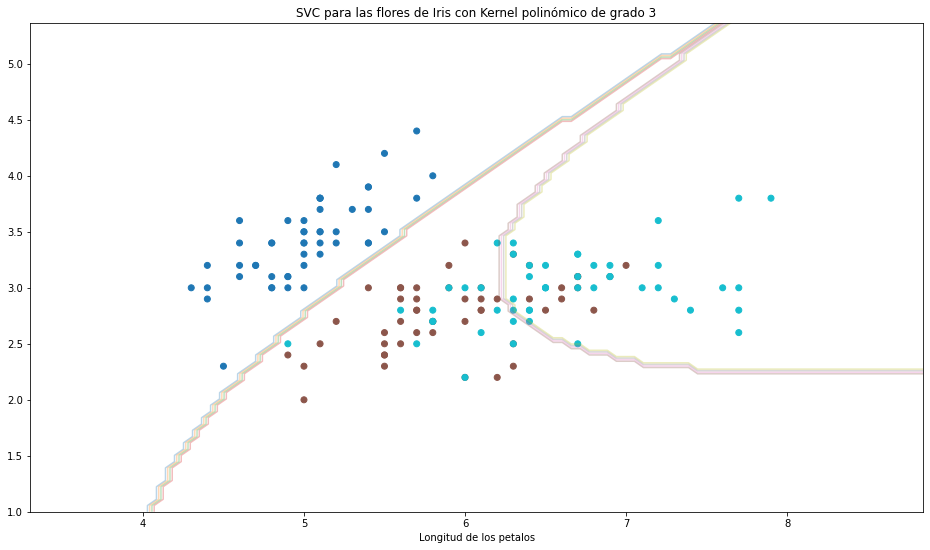

In [53]:
plt.figure(figsize=(16,9))
plt.contour(xx,yy,Ypred,cmap=plt.cm.tab10,alpha =0.3)
plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de Iris con Kernel polinómico de grado 3")

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle


In [55]:
X,Y = shuffle(X,Y,random_state=0)
X_tr,X_tst, Y_tr,Y_tst =train_test_split(X,Y,test_size=0.25, random_state=0)

In [59]:
parameters =[
             {
                 'Kernel':['rbf'],
                 'gamma':[1e-4,1e-3,1e-2,0.1,0.2,0.5],
                 'C':[1,10,100,1000]
                 
             },
             {
                 'kernel':['linear'],
                 'C':[1,10,100,1000]
             }
]

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'),param_grid=parameters,cv=5)
clf.fit(X,Y)

ValueError: ignored

In [38]:
clf.best_params_

NameError: ignored